# Table of Contents

* [Introduction](#Introduction)
* [Analysis](#Analysis)
* [Report](#Report)

# Introduction

Author: Alan Lorenzetti  
Date: 07/12/2023  

In this analysis, I will take fgsea results for the XDP ventral forebrain organoids bulk RNA-Seq analysis and use simplifyEnrichment to observe results. Moreover, I will use GOSemSim to check for similarity of terms between different contrasts.

# Analysis

In [1]:
# 20230712 alorenzetti

# description ####
# this script will take
# fgsea results generated
# for the xdp bulk rna seq
# experiment and perform
# simplifyEnrichment
# and comparison of enriched terms

# setting up ####
# loading libs
packs = c("tidyverse",
          "ggpubr",
          "GOSemSim",
          "fpc",
          "dbscan",
          "igraph",
          "MCL",
          "dynamicTreeCut",
          "apcluster",
          "simplifyEnrichment",
          "eulerr",
          "fgsea",
          "GO.db",
          "msigdbr",
          "circlize",
          "ComplexHeatmap")

lapply(packs, require, character.only = T)

theme_set(theme_pubr())

# couldn't create a new container with viridis today
# so this is a workaround for viridis colors
viridis100 = c("#440154FF", "#450558FF", "#46085CFF", "#470D60FF", "#471063FF", "#481467FF", 
"#481769FF", "#481B6DFF", "#481E70FF", "#482173FF", "#482576FF", "#482878FF", 
"#472C7AFF", "#472F7CFF", "#46327EFF", "#453581FF", "#453882FF", "#443B84FF", 
"#433E85FF", "#424186FF", "#404587FF", "#3F4788FF", "#3E4A89FF", "#3D4D8AFF", 
"#3C508BFF", "#3B528BFF", "#39558CFF", "#38598CFF", "#375B8DFF", "#355E8DFF", 
"#34608DFF", "#33638DFF", "#32658EFF", "#31688EFF", "#2F6B8EFF", "#2E6D8EFF", 
"#2D708EFF", "#2C718EFF", "#2B748EFF", "#2A768EFF", "#29798EFF", "#287C8EFF", 
"#277E8EFF", "#26818EFF", "#26828EFF", "#25858EFF", "#24878EFF", "#238A8DFF", 
"#228D8DFF", "#218F8DFF", "#20928CFF", "#20938CFF", "#1F968BFF", "#1F998AFF", 
"#1E9B8AFF", "#1F9E89FF", "#1FA088FF", "#1FA287FF", "#20A486FF", "#22A785FF", 
"#24AA83FF", "#25AC82FF", "#28AE80FF", "#2BB07FFF", "#2EB37CFF", "#31B67BFF", 
"#35B779FF", "#39BA76FF", "#3DBC74FF", "#41BE71FF", "#47C06FFF", "#4CC26CFF", 
"#51C56AFF", "#56C667FF", "#5BC863FF", "#61CA60FF", "#67CC5CFF", "#6DCD59FF", 
"#73D056FF", "#78D152FF", "#7FD34EFF", "#85D54AFF", "#8CD646FF", "#92D741FF", 
"#99D83DFF", "#A0DA39FF", "#A7DB35FF", "#ADDC30FF", "#B4DE2CFF", "#BBDE28FF", 
"#C2DF23FF", "#C9E020FF", "#D0E11CFF", "#D7E219FF", "#DDE318FF", "#E4E419FF", 
"#EBE51AFF", "#F1E51DFF", "#F7E620FF", "#FDE725FF")


# setting working directory relative to _h
if(!dir.exists("../_m/")){dir.create("../_m")}
setwd("../_m/")

Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: ggpubr



Loading required package: GOSemSim



GOSemSim v2.32.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu. Gene Ontology Semantic Similarity Analysis Using
GOSemSim. In: Kidder B. (eds) Stem Cell Transcriptional Networks.
Methods in Molecular Biology. 2020, 2117:207-215. Humana, New York, NY.



Loading required package: fpc



Loading required package: dbscan




Attaching package: ‘dbscan’




The following object is masked from ‘package:fpc’:

    dbscan




The following object is masked from ‘package:stats’:

    as.dendrogram




Loading required package: igraph




Attaching package: ‘igraph’




The following objects are masked from ‘package:lubridate’:

    %--%, union




The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union




The following objects are masked from ‘package:purrr’:

    compose, simplify




The following object is masked from ‘package:tidyr’:

    crossing




The following object is masked from ‘package:tibble’:

    as_data_frame




The following objects are masked from ‘package:stats’:

    decompose, spectrum




The following object is masked from ‘package:base’:

    union




Loading required package: MCL



Loading required package: dynamicTreeCut



Loading required package: apcluster




Attaching package: ‘apcluster’




The following object is masked from ‘package:igraph’:

    similarity




The following object is masked from ‘package:stats’:

    heatmap




Loading required package: simplifyEnrichment



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:igraph’:

    normalize, path, union




The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min




Loading required package: grid



simplifyEnrichment version 1.14.1
Bioconductor page: https://bioconductor.org/packages/simplifyEnrichment/
Github page: https://github.com/jokergoo/simplifyEnrichment
Documentation: https://jokergoo.github.io/simplifyEnrichment/
Examples: https://simplifyenrichment.github.io/

If you use it in published research, please cite:
Gu, Z. simplifyEnrichment: an R/Bioconductor package for Clustering and 
  Visualizing Functional Enrichment Results, Genomics, Proteomics & 
  Bioinformatics 2022.

This message can be suppressed by:
  suppressPackageStartupMessages(library(simplifyEnrichment))




Loading required package: eulerr



Loading required package: fgsea



Loading required package: GO.db



Loading required package: AnnotationDbi



Loading required package: stats4



Loading required package: Biobase



Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




Loading required package: IRanges



Loading required package: S4Vectors




Attaching package: ‘S4Vectors’




The following objects are masked from ‘package:lubridate’:

    second, second<-




The following objects are masked from ‘package:dplyr’:

    first, rename




The following object is masked from ‘package:tidyr’:

    expand




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname





Attaching package: ‘IRanges’




The following object is masked from ‘package:lubridate’:

    %within%




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




The following object is masked from ‘package:purrr’:

    reduce





Attaching package: ‘AnnotationDbi’




The following object is masked from ‘package:dplyr’:

    select




Loading required package: msigdbr



Loading required package: circlize



circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))





Attaching package: ‘circlize’




The following object is masked from ‘package:igraph’:

    degree




Loading required package: ComplexHeatmap



ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

In [2]:
# getting started ####
# this function will
# get a dictionary of
# go terms to go ids
# BP only
get_dict = function(){
  goterms = Term(GOTERM)
  goontology = Ontology(GOTERM)
  
  dict = tibble(go_name = paste0("GO",
                                 unname(goontology),
                                 "_",
                                 unname(goterms)),
                go_id = names(goterms)) %>% 
    filter(str_detect(go_name, pattern = "^GOBP")) %>% 
    mutate(go_name = str_to_upper(go_name)) %>% 
    mutate(go_name = str_replace_all(go_name," ", "_")) %>% 
    mutate(go_name = str_replace_all(go_name,"POLY\\(A\\)", "POLY_A")) %>% 
    mutate(go_name = str_replace_all(go_name,"-", "_")) %>% 
    mutate(go_name = str_replace_all(go_name,"\\.", "_")) %>% 
    mutate(go_name = str_replace_all(go_name,"\\/", "_")) %>% 
    mutate(go_name = str_replace_all(go_name,"\\(", "")) %>% 
    mutate(go_name = str_replace_all(go_name,"\\)", "")) %>% 
    mutate(go_name = str_replace_all(go_name,"\\'", "")) %>% 
    mutate(go_name = str_replace_all(go_name,",", ""))
  
  return(dict)
}

In [3]:
# this function will filter input
# fgsea objects:
# filter according to padj threshold
# will retain only GOBP
# will retain only GOBPs compatible with these packages (due version incompatibility?)
filter_fgsea_res = function(input_tibble = input_tibble,
                            padj_thr = padj_thr,
                            dictionary_w_goids = dictionary_w_goids) {

    # input_tibble = fgsea1
    # padj_thr = 0.00001
    # dictionary_w_goids = dict
    
    filtered_tibble = input_tibble %>% 
        filter(padj < padj_thr) %>% 
        filter(str_detect(pathway, pattern = "^GOBP"))

    # finding IDs for our terms
    filtered_tibble = left_join(x = filtered_tibble,
                                y = dictionary_w_goids,
                                by = c("pathway" = "go_name"))
    
    return(filtered_tibble)
    
}

In [4]:
# this function will use simplify enrichment
# to cluster the terms of the input filtered fgsea tibble
# and draw a heatmap using complex heatmap
prepare_ht_and_draw = function(filtered_fgsea = filtered_fgsea,
                               clustering_method = clustering_method,
                               exclude_words = exclude_words,
                               max_words = max_words,
                               title = title) {

    # filtered_fgsea = fgsea1
    # clustering_method = "kmeans"
    # exclude_words = c("process", "system")
    # max_words = 12

    mat1 = GO_similarity(filtered_fgsea$go_id, ont = "BP")
    clust1 = cluster_terms(mat1, method = "kmeans")
    ht1 = ht_clusters(mat = mat1, cl = clust1,
                      draw_word_cloud = F,
                      run_draw = F)
    
    go_id = rownames(mat1)
    
    align_to = split(seq_along(clust1), clust1)
    go_id = split(go_id, clust1)
    
    align_to = align_to[names(align_to) != "0"]
    go_id = go_id[names(go_id) != "0"]
    
    cloudAnnot1 = rowAnnotation(keywords = anno_word_cloud_from_GO(align_to = align_to,
                                                                   go_id = go_id,
                                                                   exclude_words = exclude_words,
                                                                   max_words = max_words))
    
    NEScol = colorRamp2(c(-3, 0, 3),
                        c("#4E79A7", "white", "#E15759"))
    
    row_ha = HeatmapAnnotation(which = "row",
                               NES = anno_simple(filtered_fgsea %>%
                                                   filter(go_id %in% rownames(mat1)) %>%
                                                   pull(NES),
                                                 col = NEScol,
                                                 border = T))
    heatLegs = list(NES = Legend(title = "NES",
                                 col_fun = NEScol))

    final_drawn_ht = draw(object = row_ha + ht1 + cloudAnnot1,
                          main_heatmap = "Similarity",
                          column_title = title,
                          annotation_legend_list = heatLegs)

    return(final_drawn_ht)
}

In [5]:
# this function will take
# as input a named list of GO vectors
# to be compared to each other
# the function will compute similarity
# of all vs all including at least X
# random sets of comparable size
# the function returns a matrix
# the mode of running is serial with the number of
# operations being 
# (length(go_lists)*random_sets_per_input)^2
compare_go_lists = function(go_lists = go_lists,
                            random_sets_per_input = random_sets_per_input){
  
  semData = godata("org.Hs.eg.db", ont="BP")
  
  lens = lapply(go_lists, length) %>% unlist()
  len_min = min(lens)
  len_max = max(lens)
  
  random_lens = sample(x = len_min:len_max, size = length(lens)*random_sets_per_input)
  
  random_lists = list()
  for(i in 1:length(random_lens)) {
    random_lists[[paste0("random_", i)]] = random_GO(n = random_lens[[i]],
                                                     db = "org.Hs.eg.db",
                                                     ont = "BP")
  }
  
  final_list = c(go_lists, random_lists)
  M = matrix(data = NA,
             nrow = length(final_list),
             ncol = length(final_list))
  
  rownames(M) = names(final_list)
  colnames(M) = names(final_list)
  
  for(i in 1:length(final_list)){
    for(j in 1:length(final_list)){
      # print(paste("computing", i, j))
      M[i,j] = mgoSim(GO1 = final_list[[i]],
                      GO2 = final_list[[j]],
                      measure = "Rel",
                      combine = "BMA",
                      semData = semData)
      
    }
  }
  
  return(M)

}

In [6]:
# this function is the cell function
# helper for Heatmap
# it is useful to display similarity numbers
# on top the heatmap with appropriate colors
cell_numb_fun = function(j, i, x, y, w, h, col) {
    # Compute the brightness of the cell color
    col_rgb = col2rgb(col)
    brightness = sqrt(0.299*col_rgb[1]^2 + 0.587*col_rgb[2]^2 + 0.114*col_rgb[3]^2)
    # Choose black or white for the text color based on the cell color brightness
    text_col = ifelse(brightness < 130, "white", "black")
    grid.text(sprintf("%.3f", M[i, j]), x, y, gp = gpar(col = text_col))
}

# Analysis

In [7]:
# main ####

# setting seed
set.seed(667)

# cuts
padj_thr = 10^-5

# paths
# patient vs. healthy
# xdp vs. control
# xdp vs. dSVA
# dSVA vs. control

paths2 = c(
     "../../_m/Patient_v_Control_GOresults.tsv",
     "../../_m/XDP_v_Control_GOresults.tsv",
     "../../_m/XDP_v_dSVA_GOresults.tsv",
     "../../_m/dSVA_v_Control_GOresults.tsv"
)

# pathways used in fgsea
pathways = gmtPathways("../../_h/msigdb_v2023.1.Hs_GMTs/c5.go.v2023.1.Hs.symbols.gmt")

# getting a dictionary of 
# go names and ids
dict = get_dict()

In [8]:
results2 = list()
for(i in paths2){
    title = basename(i)

    fgsea2 = read_tsv(file = i)
    results2[[title]][["filtered_fgsea"]] = filter_fgsea_res(input_tibble = fgsea2,
                                                             padj_thr = padj_thr,
                                                             dictionary_w_goids = dict)

    tiff(file = paste0("method2_padj", padj_thr, "_", title, ".tiff"), units = "in", res = 600, width = 12, height = 12)
        results2[[title]][["ht"]] = prepare_ht_and_draw(filtered_fgsea = results2[[title]][["filtered_fgsea"]],
                                                        clustering_method = "kmeans",
                                                        exclude_words = c("process", "system"),
                                                        max_words = 12, 
                                                        title = title)
    dev.off()

    pdf(file = paste0("method2_padj", padj_thr, "_", title, ".pdf"), width = 12, height = 12)
        results2[[title]][["ht"]] = prepare_ht_and_draw(filtered_fgsea = results2[[title]][["filtered_fgsea"]],
                                                        clustering_method = "kmeans",
                                                        exclude_words = c("process", "system"),
                                                        max_words = 12, 
                                                        title = title)
    dev.off()
}

save(results2, file = paste0("results2_", padj_thr,  ".RData"))

Rows: 4684 Columns: 8


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): pathway, leadingEdge
dbl (6): pval, padj, log2err, ES, NES, size



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in godata(db, ont = ont):
“use 'annoDb' instead of 'OrgDb'”


1/587 GO term is removed.



Cluster 548 terms by 'kmeans'...


 13 clusters, used 8.830203 secs.



Perform keywords enrichment for 13 GO lists...



1/587 GO term is removed.



Cluster 548 terms by 'kmeans'...


 17 clusters, used 8.943736 secs.



Perform keywords enrichment for 17 GO lists...



Rows: 4617 Columns: 8


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): pathway, leadingEdge
dbl (6): pval, padj, log2err, ES, NES, size



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


1/573 GO term is removed.



Cluster 537 terms by 'kmeans'...


 18 clusters, used 9.000162 secs.



Perform keywords enrichment for 18 GO lists...



1/573 GO term is removed.



Cluster 537 terms by 'kmeans'...


 21 clusters, used 8.374918 secs.



Perform keywords enrichment for 21 GO lists...



Rows: 4603 Columns: 8


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): pathway, leadingEdge
dbl (6): pval, padj, log2err, ES, NES, size



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


1/264 GO term is removed.



Cluster 255 terms by 'kmeans'...


 9 clusters, used 0.7423296 secs.



Perform keywords enrichment for 9 GO lists...



1/264 GO term is removed.



Cluster 255 terms by 'kmeans'...


 11 clusters, used 0.7376242 secs.



Perform keywords enrichment for 11 GO lists...



Rows: 4615 Columns: 8


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): pathway, leadingEdge
dbl (6): pval, padj, log2err, ES, NES, size



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


1/96 GO term is removed.



Cluster 89 terms by 'kmeans'...


 7 clusters, used 0.02429867 secs.



Perform keywords enrichment for 7 GO lists...



1/96 GO term is removed.



Cluster 89 terms by 'kmeans'...


 6 clusters, used 0.02155828 secs.



Perform keywords enrichment for 6 GO lists...



In [9]:
# similarity of GO term lists
my_lists = list(patient_vs_healthy = results2$Patient_v_Control_GOresults.tsv$filtered_fgsea$go_id,
                xdp_vs_control = results2$XDP_v_Control_GOresults.tsv$filtered_fgsea$go_id,
                xdp_vs_dsva = results2$XDP_v_dSVA_GOresults.tsv$filtered_fgsea$go_id,
                dsva_vs_control = results2$dSVA_v_Control_GOresults.tsv$filtered_fgsea$go_id)

M = compare_go_lists(go_lists = my_lists,
                     random_sets_per_input = 3)

Warning message in godata("org.Hs.eg.db", ont = "BP"):
“use 'annoDb' instead of 'OrgDb'”


preparing gene to GO mapping data...



preparing IC data...



In [10]:
ht_comparison_of_lists = Heatmap(matrix = M,
                                 name = "BMA",
                                 cell_fun = cell_numb_fun,
                                 col = viridis100)

pdf(file = paste0("contrast_similarity_ht_", padj_thr, ".pdf"), width = 10, height = 10)
    ht_comparison_of_lists
dev.off()

tiff(file = paste0("contrast_similarity_ht_", padj_thr, ".tiff"), units = "in", res = 600, width = 10, height = 10)
    ht_comparison_of_lists
dev.off()

pdf 
  2

pdf 
  2

# Report

# Similarity between GO term lists (only fgsea Max = 500; method 2)

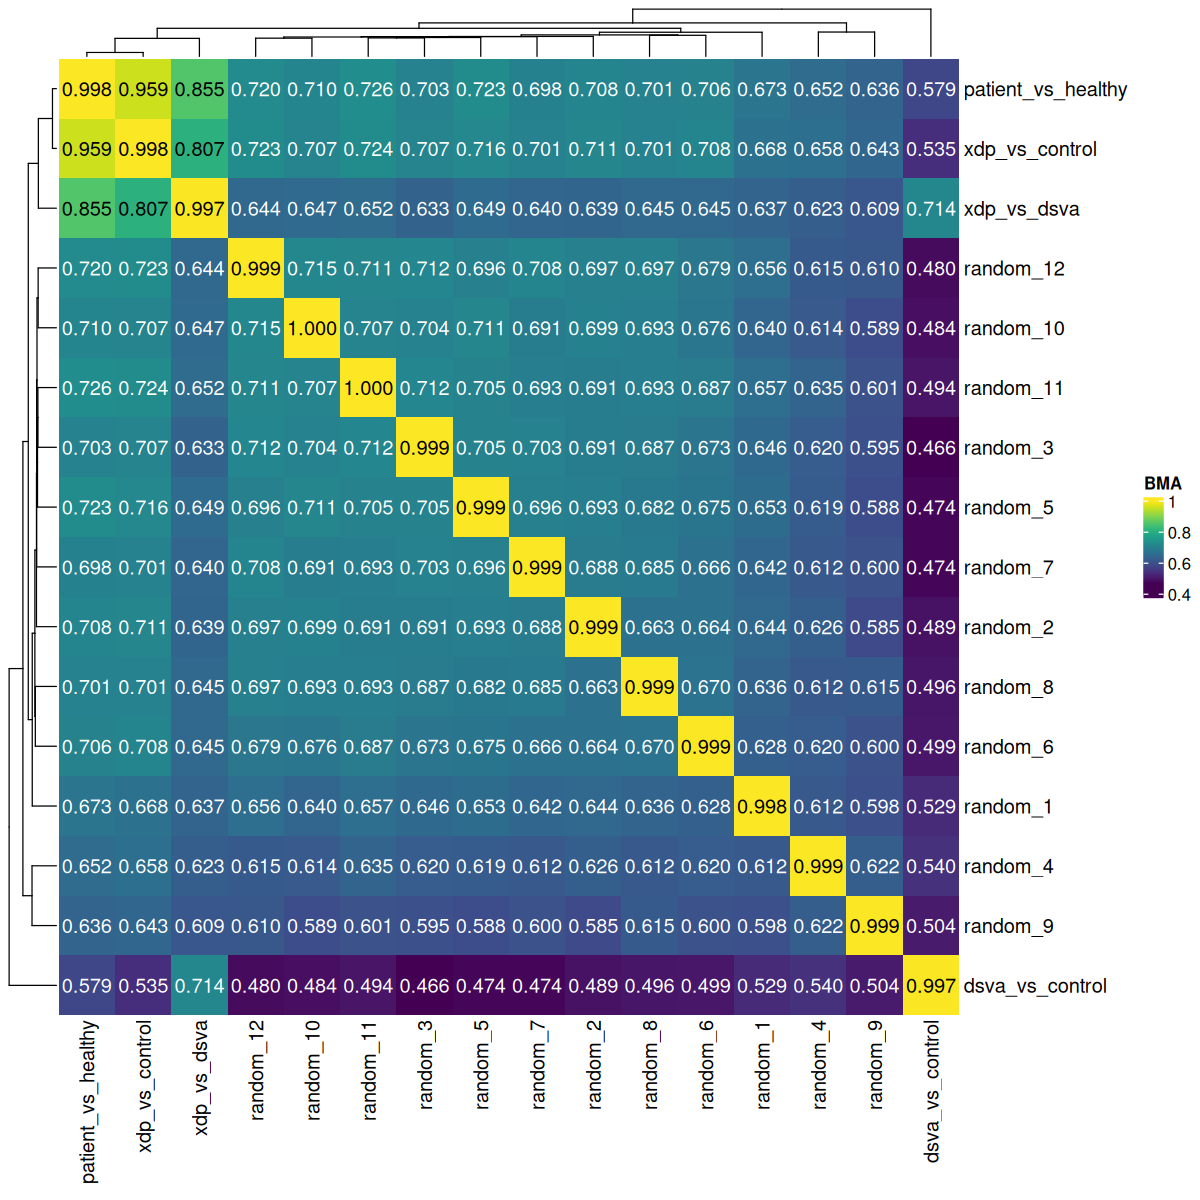

In [11]:
options(repr.plot.height = 10, repr.plot.width = 10)
ht_comparison_of_lists

## Patient vs. Healthy

### Max = 500 in fgsea

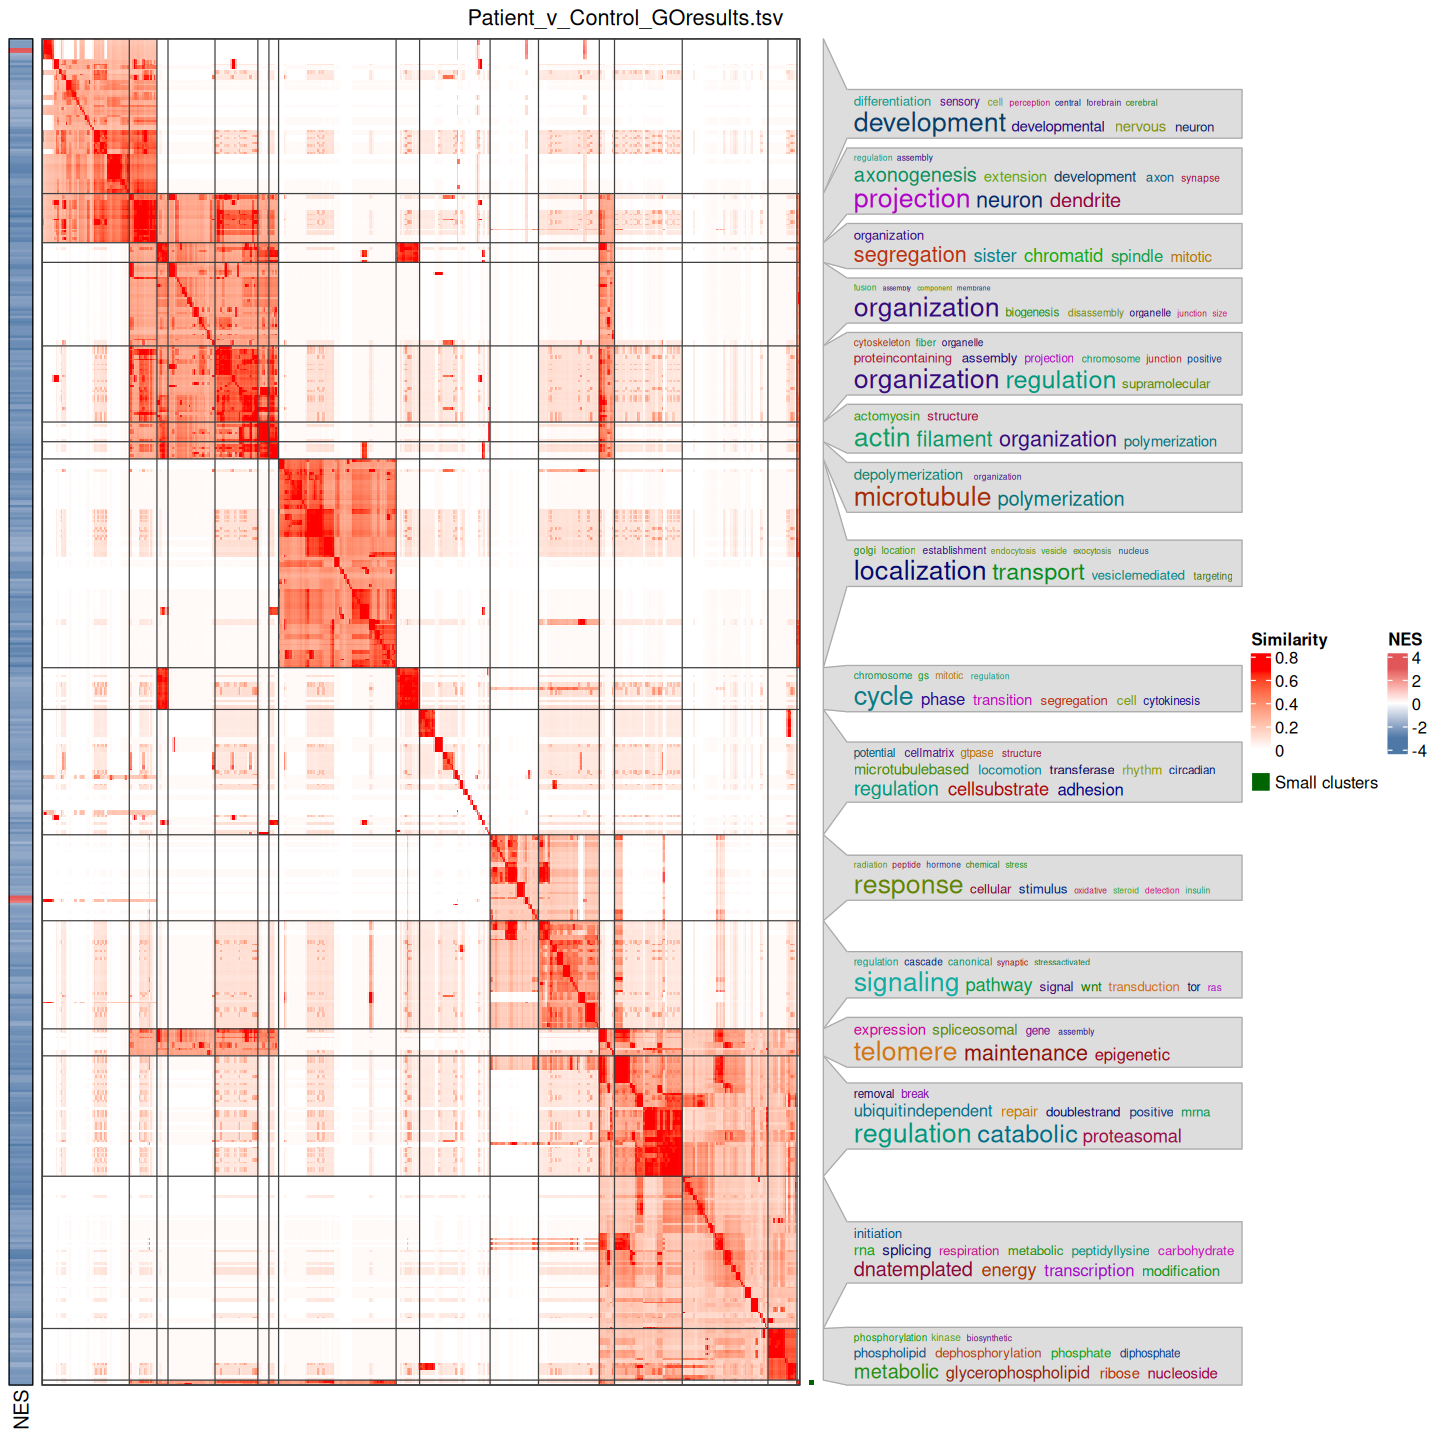

In [12]:
options(repr.plot.height = 12, repr.plot.width = 12)
results2$Patient_v_Control_GOresults.tsv$ht

## XDP vs. Control

### Max = 500 in fgsea

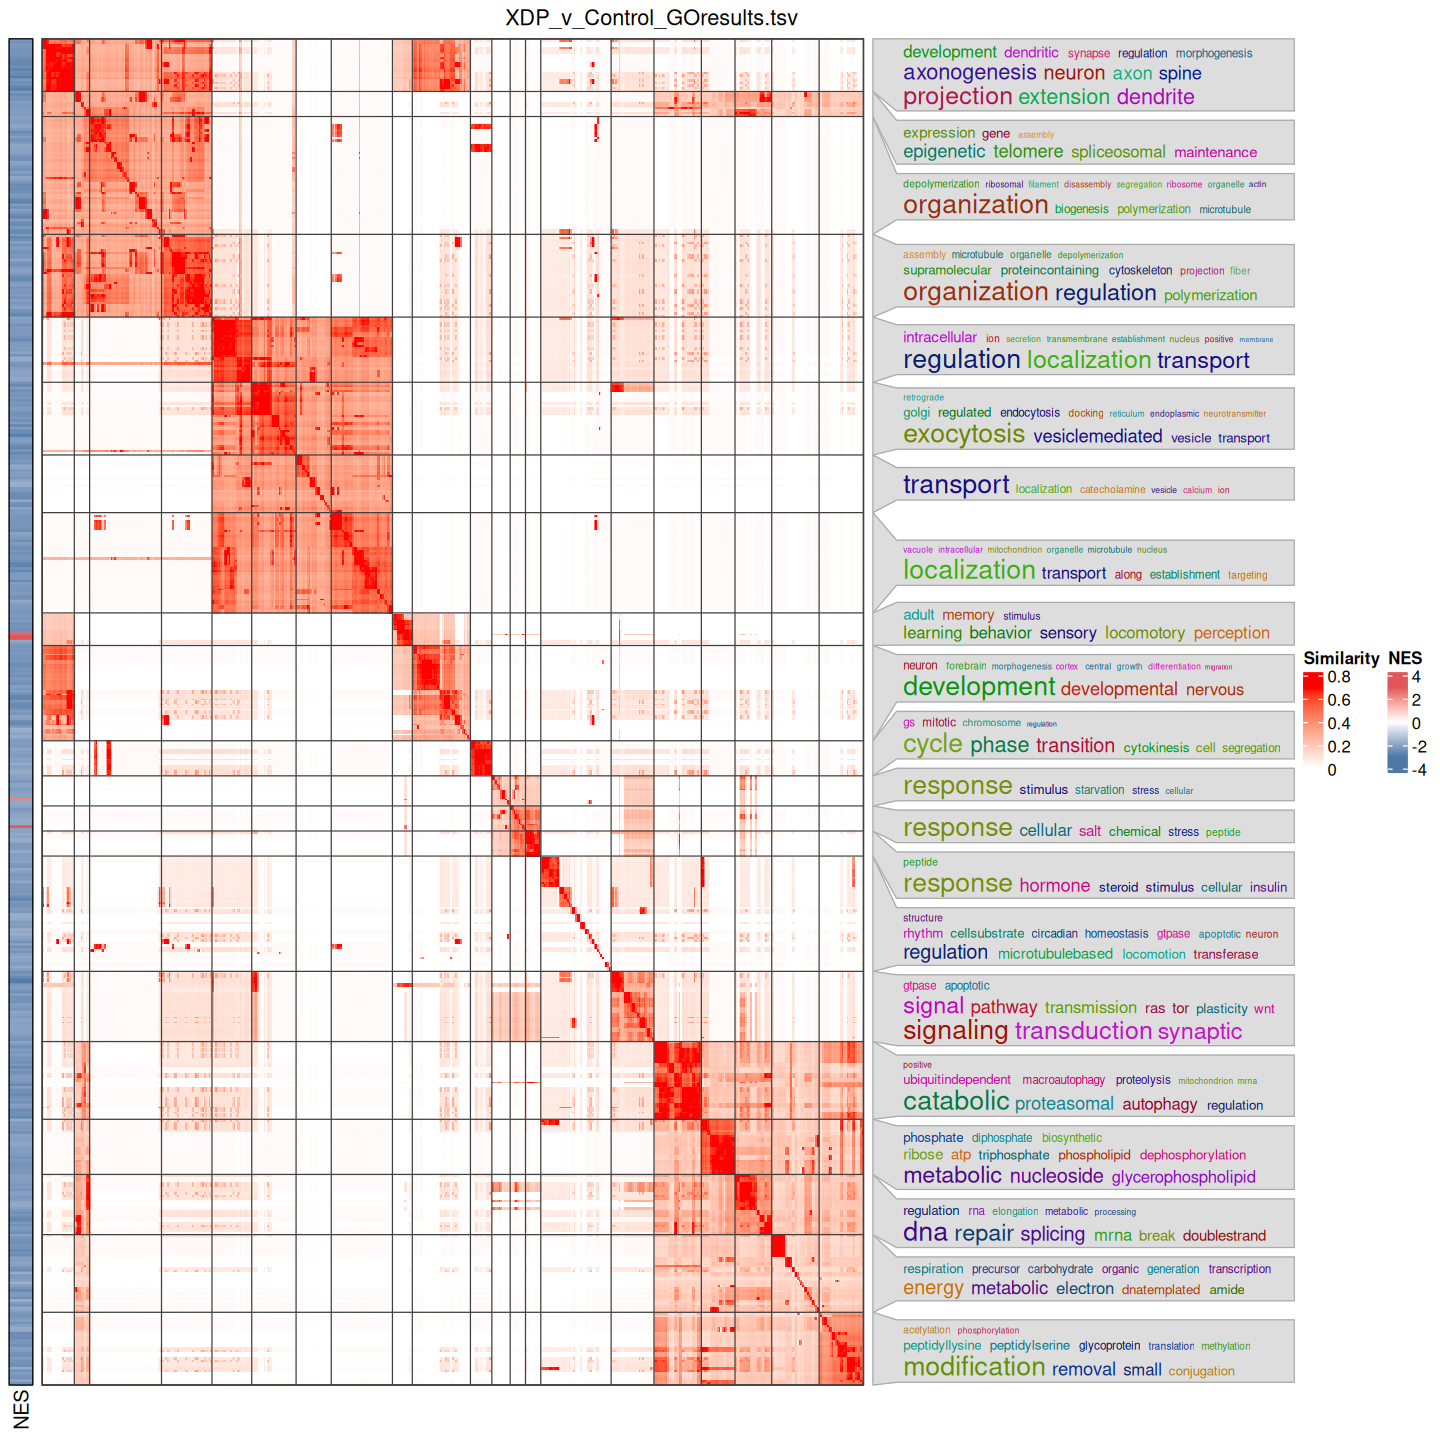

In [13]:
options(repr.plot.height = 12, repr.plot.width = 12)
results2$XDP_v_Control_GOresults.tsv$ht

## XDP vs. dSVA

### Max = 500 in fgsea

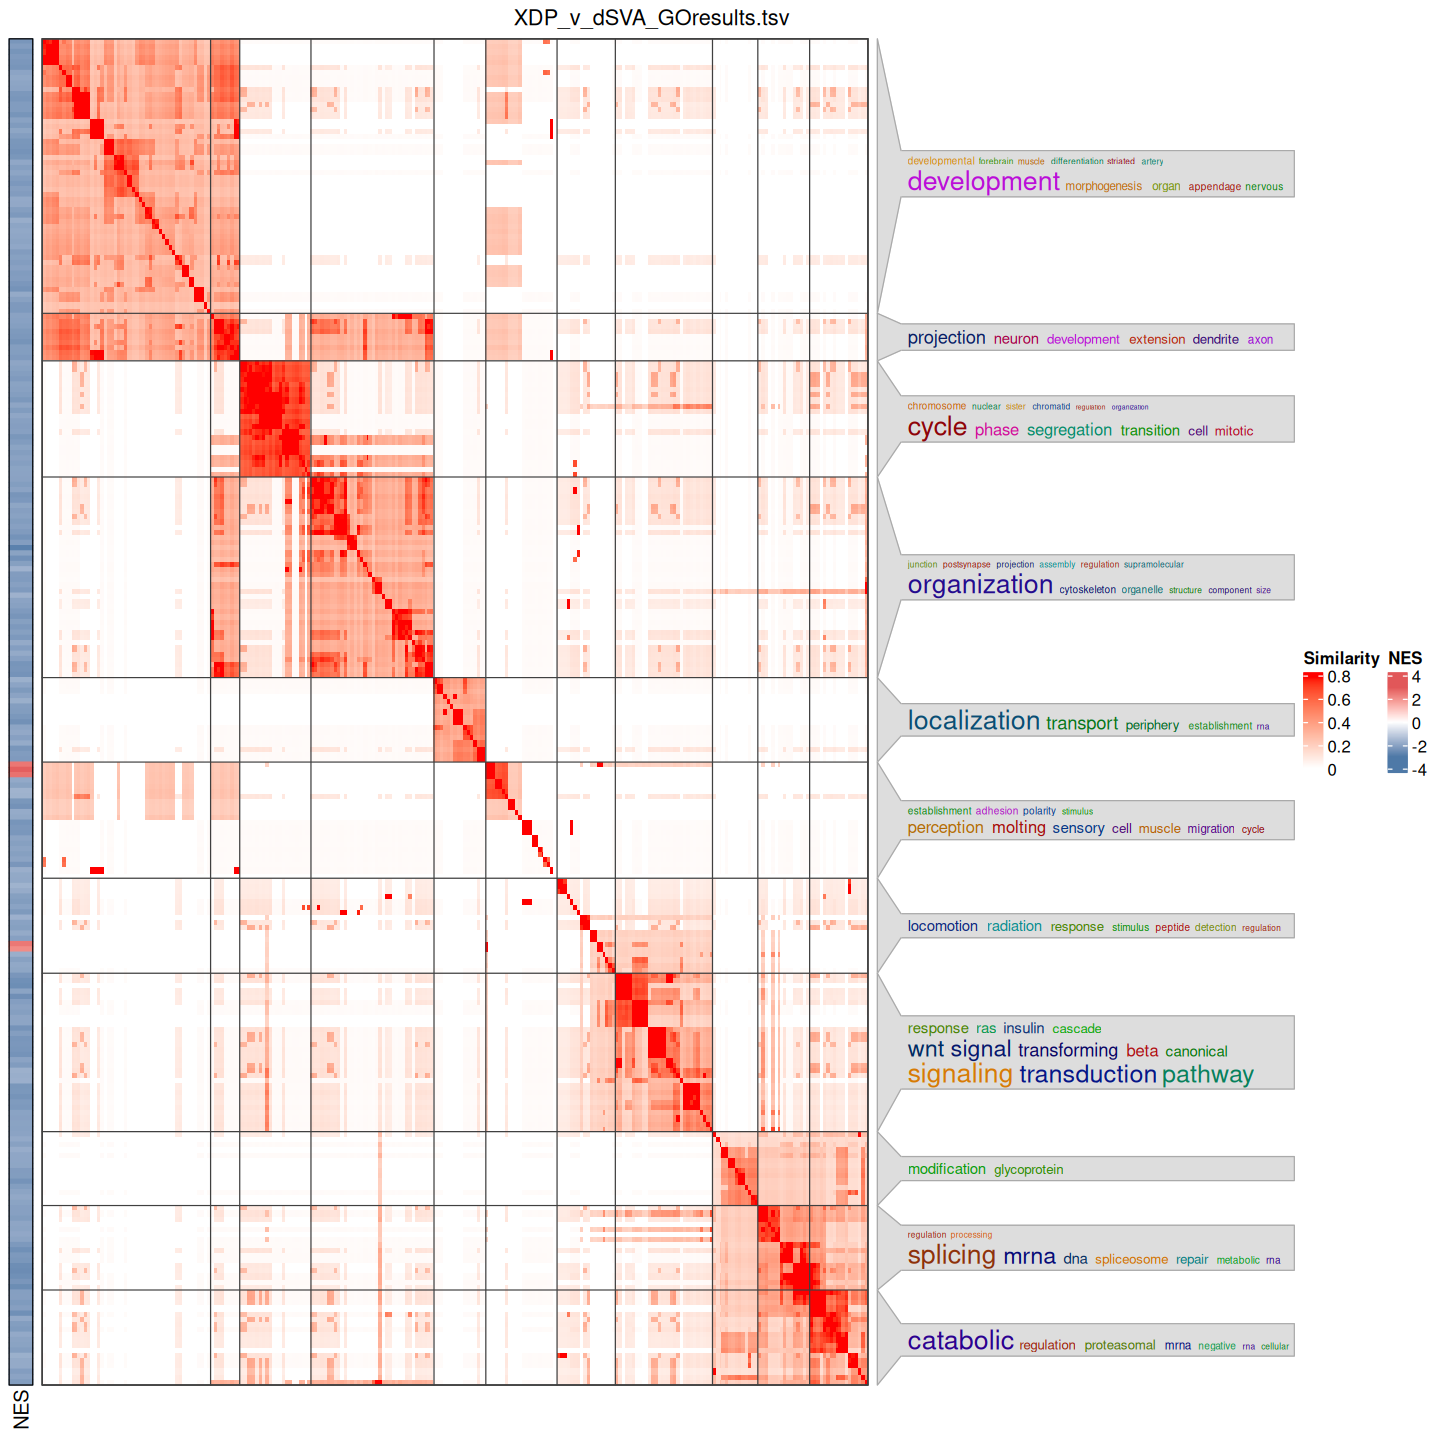

In [14]:
options(repr.plot.height = 12, repr.plot.width = 12)
results2$XDP_v_dSVA_GOresults.tsv$ht

## dSVA vs. Control

### Max = 500 in fgsea

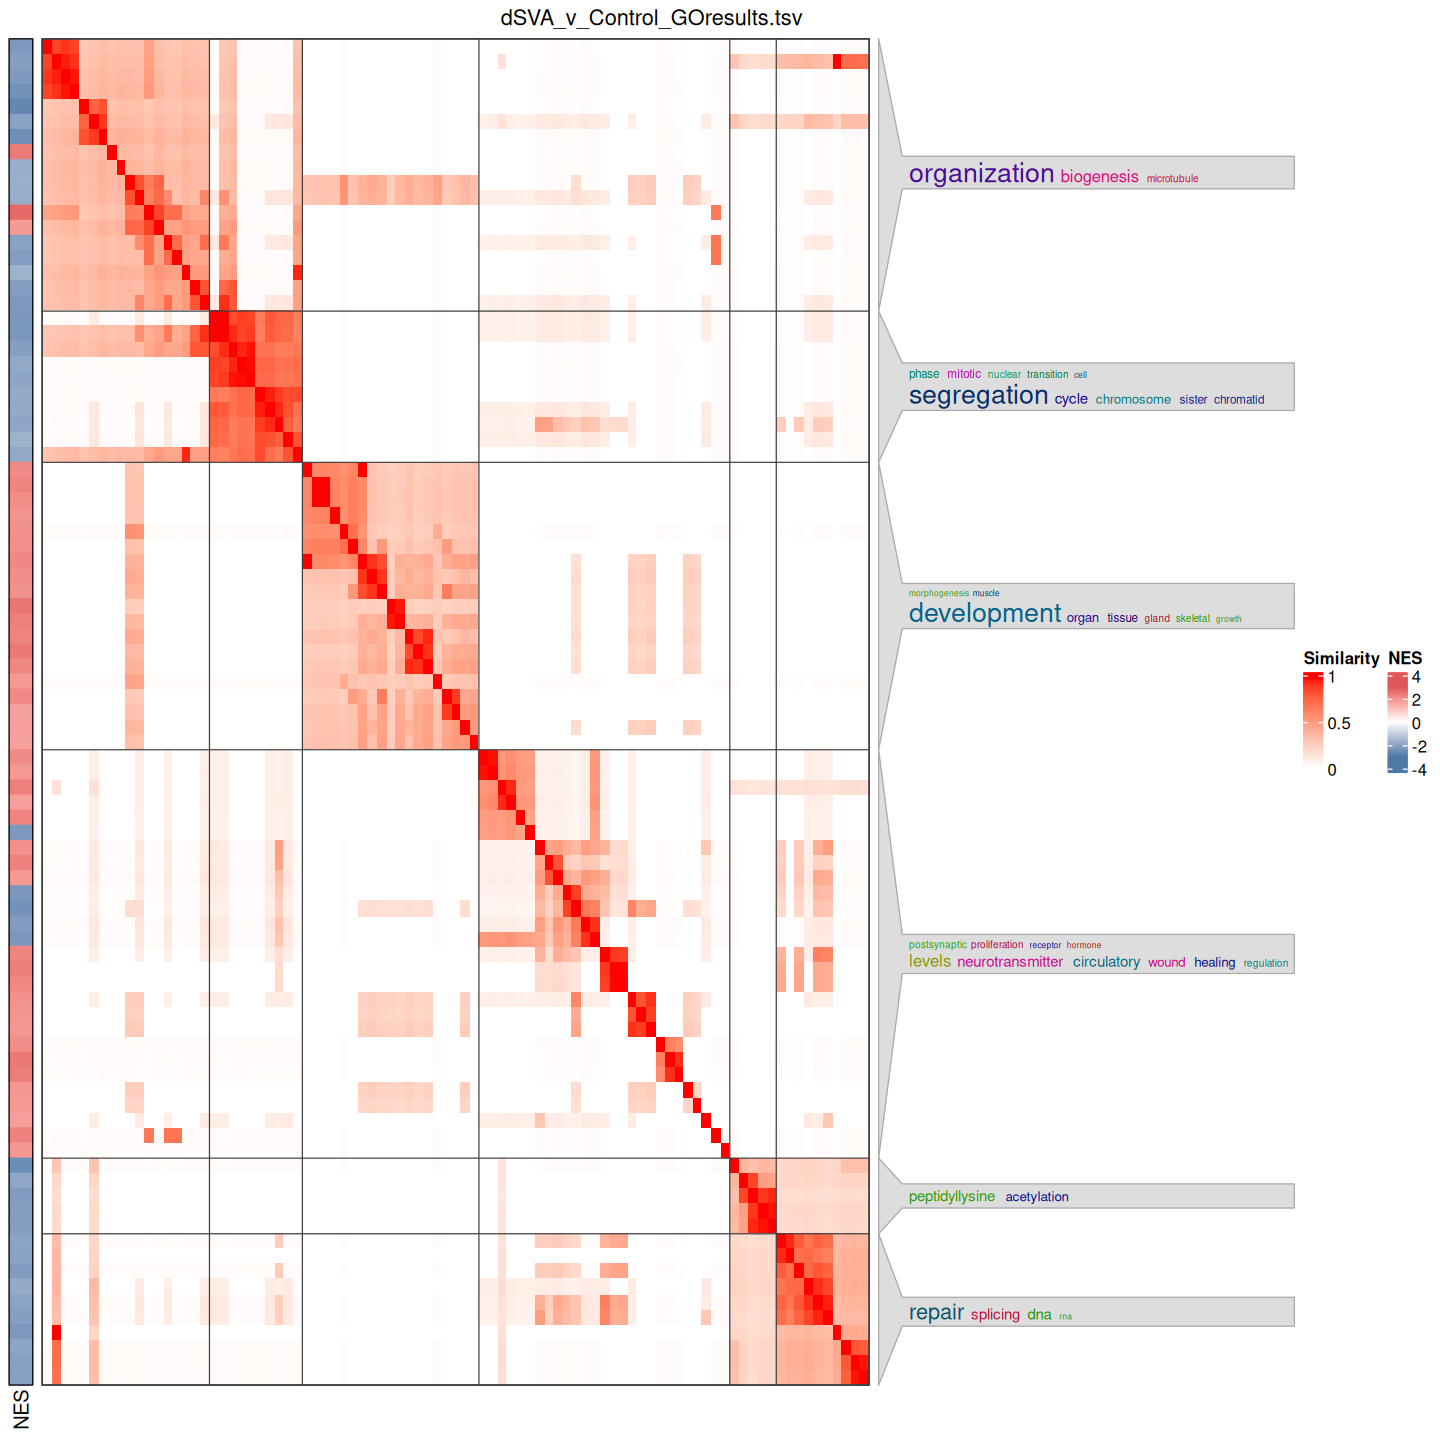

In [15]:
options(repr.plot.height = 12, repr.plot.width = 12)
results2$dSVA_v_Control_GOresults.tsv$ht

# Session Info

In [16]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libblas.so.3.12.0 
LAPACK: /usr/lib/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: EST
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ComplexHeatmap_2.22.0     circlize_0.4.16          
 [3] msigdbr_7.5.1             GO.db_3.20.0             
 [5] AnnotationDbi_1.68.0      IRanges_2.40.1           
 [7] S4Vectors_0.44.0          Biobase_2.66.0           
 [9] fgsea_1.30.0             